
**Assignment - Week 3**

---
*Christopher Mena - CAI2840C*



---


**IMPORTS**


---



In [66]:
# Imports & Loading Images

import cv2
import numpy as np
import matplotlib.pyplot as plt




---


**EXERCISE #1**  - Santorini


---



Text(0.5, 1.0, 'Higher (1.2x): clipped')

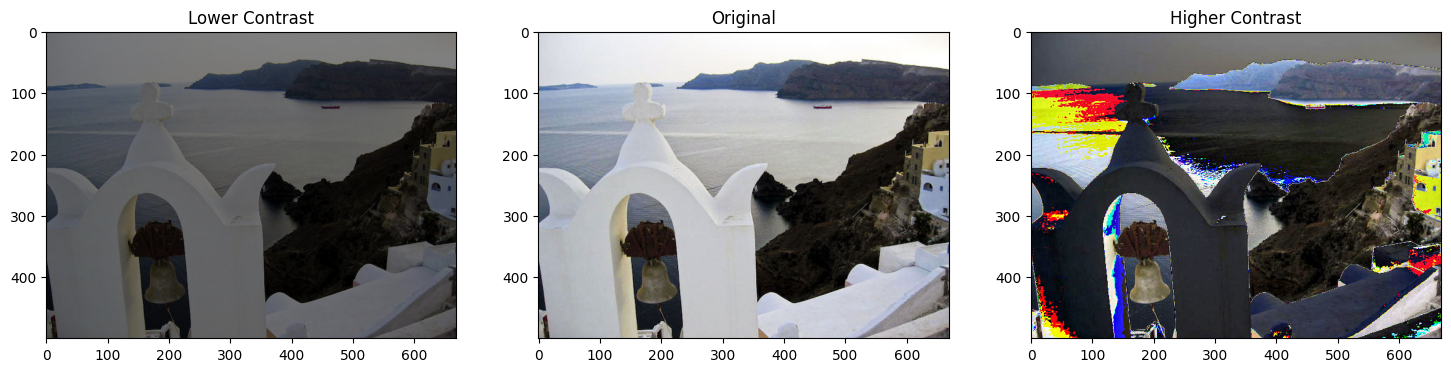

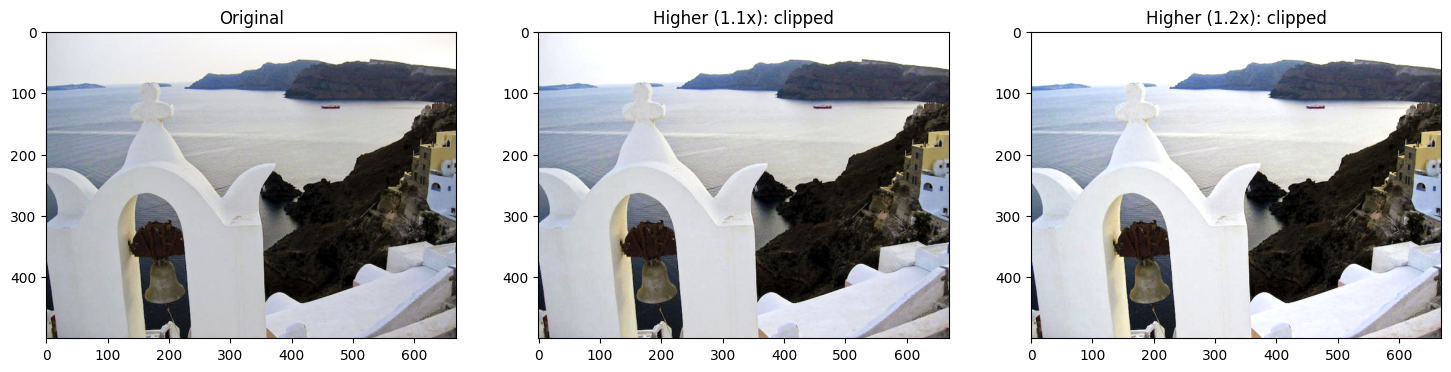

In [48]:
# EXERCISE #1 -  Santorini

# Load the images
img = cv2.imread('/content/Santorini.jpg', cv2.IMREAD_COLOR)

# Create matrices with constant scale factors for contrast adjustment
matrix1 = np.ones(img.shape) * 0.5  # decrease contrast
matrix2 = np.ones(img.shape) * 1.5  # increase contrast

# Create lower and higher contrast images.
img_lower  = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Display the images (original, lower contrast, higher contrast)
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');


# Create higher contrast images using scale factors of 1.1 and 1.2 (using np.clip() to clip high values to 255)
img_higher1  = np.clip(img * 1.1, 0, 255).astype(np.uint8)
img_higher2  = np.clip(img * 1.2, 0, 255).astype(np.uint8)

# Display the images (original, higher (1.1x) clipped, higher (1.2x) clipped)
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x): clipped')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x): clipped')





---


**EXERCISE #2** - Sheet Music

---



Text(0.5, 1.0, 'Thresholded (adaptive)')

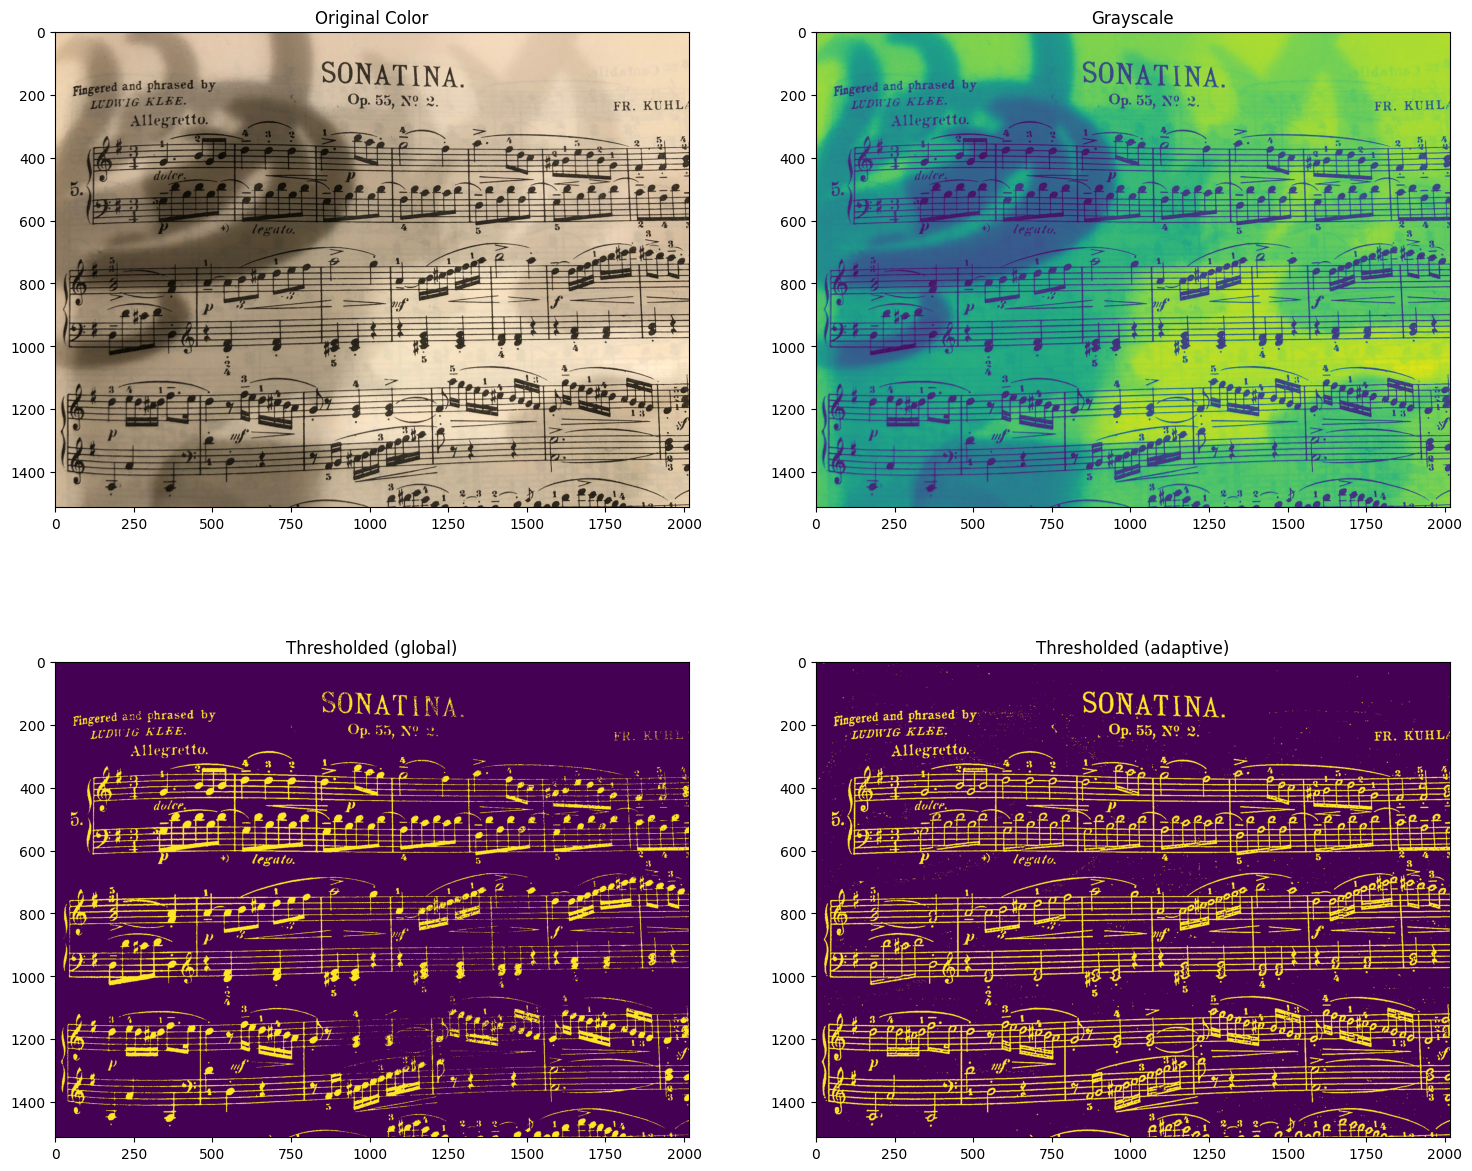

In [87]:
# Exercise #2 - Sheet Music

# Images
img2 = cv2.imread('/content/Sheet_Music_Test-1.jpg')
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # show original colors for fun
img2_grayscale = cv2.imread('/content/Sheet_Music_Test-1.jpg', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding (find the best global threshold that isolates the music from the shadows).
# Use a threshold type of: cv2.THRESH_BINARY_INV
retval, img_thresh = cv2.threshold(img2_grayscale, 60, 255, cv2.THRESH_BINARY_INV)

# Adaptive thresholding for fun
img_thresh_adp = cv2.adaptiveThreshold(img2_grayscale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 13, 7)

# Display the images.
plt.figure(figsize = [18,15])
plt.subplot(221); plt.imshow(img2_rgb); plt.title('Original Color')
plt.subplot(222); plt.imshow(img2_grayscale); plt.title('Grayscale')
plt.subplot(223); plt.imshow(img_thresh); plt.title('Thresholded (global)')
plt.subplot(224); plt.imshow(img_thresh_adp); plt.title('Thresholded (adaptive)')



---


**EXERCISE #3** - Green Circle


---



Text(0.5, 1.0, 'Combined')

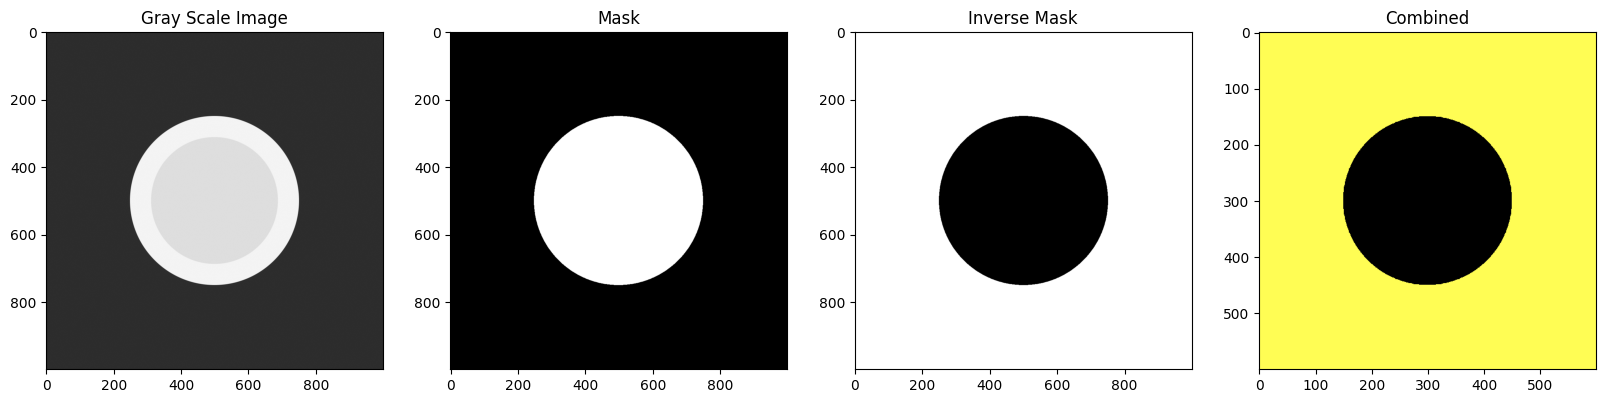

In [102]:
# Exercise #3 - Green Circle

# Load Images
img_green_circle = cv2.imread('/content/green_circle.png', cv2.IMREAD_COLOR)
img_yellow_square = cv2.imread('/content/yellow_square.png', cv2.IMREAD_COLOR)

# Convert the green circle image to grayscale using cvtColor()
img_gray_circle = cv2.cvtColor(img_green_circle, cv2.COLOR_BGR2GRAY)

# Use the threshold() function to create a binary mask (white RING inside a black square).
# Hint: You will need to CARFULLY choose a threshold value that isolates the light gray ring.
retval, img_ring_mask = cv2.threshold(img_gray_circle, 100, 255, cv2.THRESH_BINARY)


# Use the bitwise_not() function to create an inverse mask.
img_ring_mask_inv = cv2.bitwise_not(img_ring_mask)

# Use bitwise_and() to create the final combined image (black ring on a yellow square)
img_ring_mask_inv2 = cv2.resize(img_ring_mask_inv, (img_yellow_square.shape[1], img_yellow_square.shape[0]))  # need a resized to match
img_combined = cv2.bitwise_and(img_yellow_square, img_yellow_square, mask = img_ring_mask_inv2)

# Convert to RGB for proper display
img_combined_rgb = cv2.cvtColor(img_combined, cv2.COLOR_BGR2RGB)

# Display the images.
plt.figure(figsize = [20,10])
plt.subplot(141); plt.imshow(img_gray_circle, cmap='gray'); plt.title('Gray Scale Image')
plt.subplot(142); plt.imshow(img_ring_mask, cmap='gray'); plt.title('Mask')
plt.subplot(143); plt.imshow(img_ring_mask_inv, cmap='gray'); plt.title('Inverse Mask')
plt.subplot(144); plt.imshow(img_combined_rgb); plt.title('Combined')

Thank you.